# Principal Component Analysis

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = load_iris(as_frame=True).frame

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


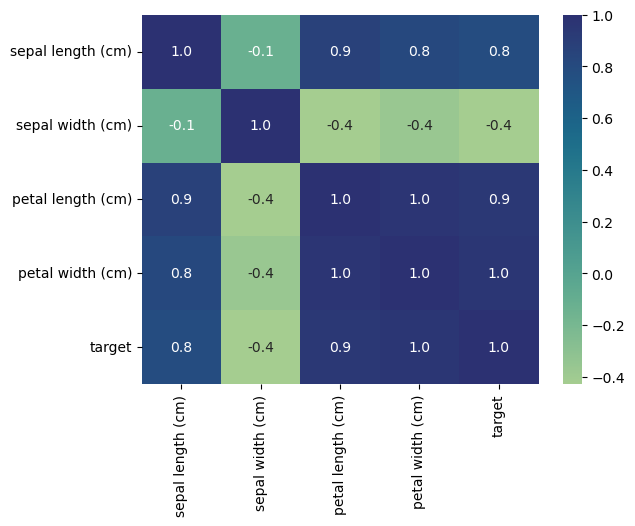

In [4]:
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="crest")
plt.show()

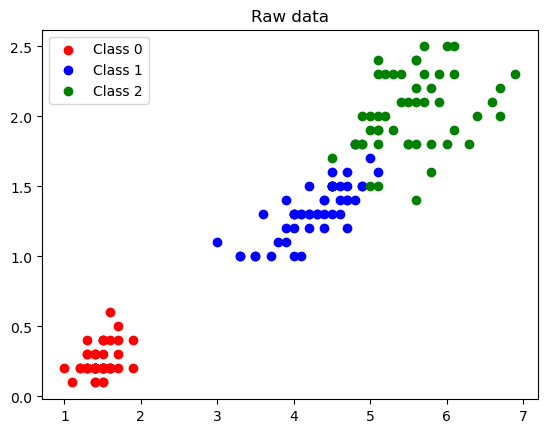

In [5]:
X_mini = df[["petal length (cm)", "petal width (cm)"]].to_numpy()
y_mini = df["target"].to_numpy()

num_classes = 3
colors = ["r", "b", "g"]

for i in range(num_classes):
  plt.scatter(X_mini[i == y_mini, 0], X_mini[i == y_mini, 1], c=colors[i], label=f"Class {i}")

plt.legend()
plt.title("Raw data")
plt.show()

In [6]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [7]:
pca = PCA(n_components=2)
X_pca_raw = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

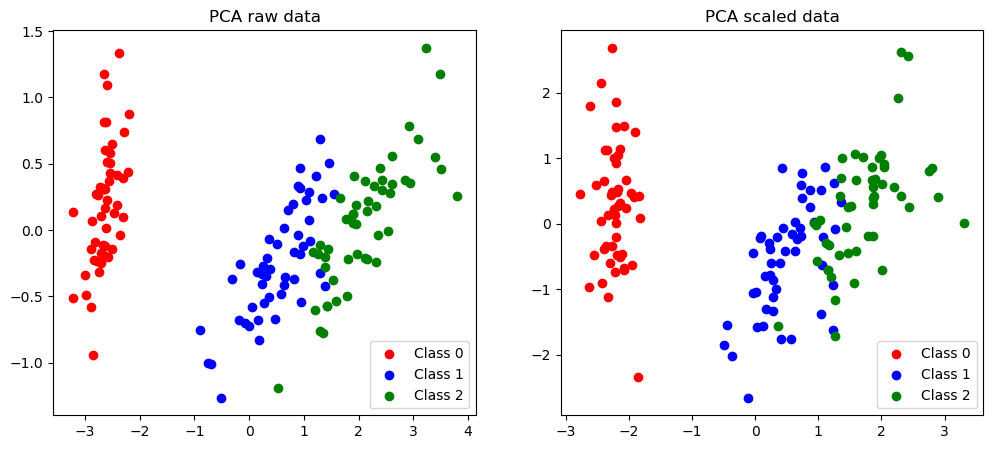

In [8]:
num_classes = 3
colors = ["r", "b", "g"]

plt.figure(figsize=(12, 5))
plt.subplot(121)
for i in range(num_classes):
  plt.scatter(X_pca_raw[i == y, 0], X_pca_raw[i == y, 1], c=colors[i], label=f"Class {i}")

plt.legend()
plt.title("PCA raw data")

plt.subplot(122)
for i in range(num_classes):
  plt.scatter(X_pca_scaled[i == y, 0], X_pca_scaled[i == y, 1], c=colors[i], label=f"Class {i}")

plt.legend()
plt.title("PCA scaled data")

plt.show()

# KNN Classifier with PCA on the Earthquake Alert Prediction Dataset

[Earthquake Alert Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/ahmeduzaki/earthquake-alert-prediction-dataset)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [10]:
df = pd.read_csv("../data/earthquake_alert_balanced_dataset.csv")
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [12]:
df["alert"] = df["alert"].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   int8   
dtypes: float64(5), int8(1)
memory usage: 52.2 KB


In [13]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape

(1040, 5)

In [14]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca.shape

(1040, 2)

In [15]:
model = KNeighborsClassifier()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

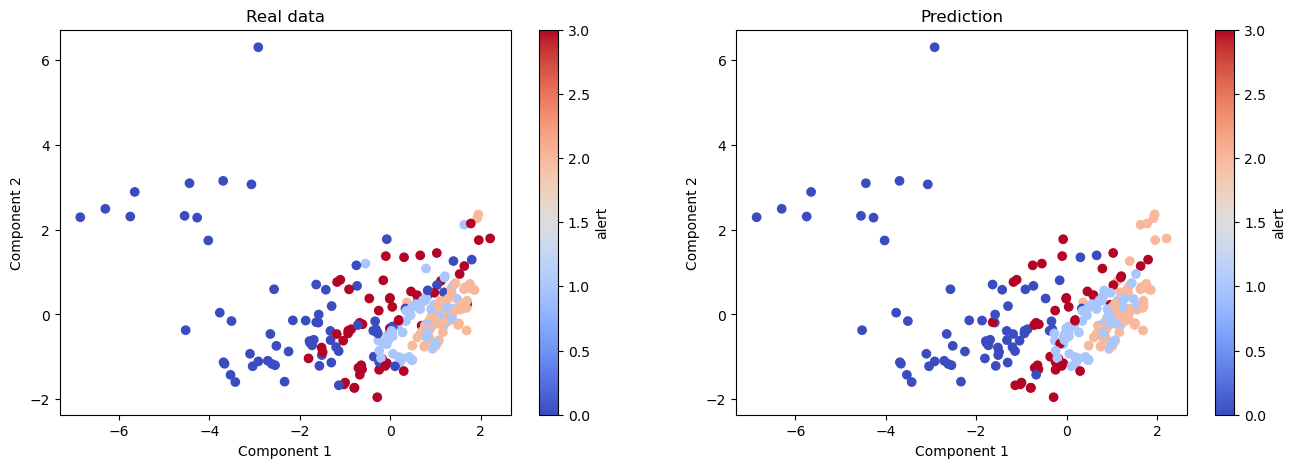

In [16]:
vmin = min(y_test.min(), y_pred.min())
vmax = max(y_test.max(), y_pred.max())

plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, vmin=vmin, vmax=vmax, cmap="coolwarm")
plt.colorbar(label="alert")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Real data")

plt.subplot(122)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, vmin=vmin, vmax=vmax, cmap="coolwarm")
plt.colorbar(label="alert")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Prediction")

plt.show()

In [17]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}%")

MSE: 1.1807692307692308
Accuracy: 70.0%
